# Lap EDA_Round Modelling

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## loading cleaning data

In [455]:
ca_df=pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round2.csv")

In [456]:
ca_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [457]:
# droping Unnamed Column

ca_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [458]:
# droping duplicates

ca_df.drop_duplicates(inplace=True)

In [459]:
# shows the percentage of null values in a column

round(ca_df.isna().sum()/len(ca_df),4)*100

Customer                          0.00
State                             5.65
Customer Lifetime Value           0.00
Response                          5.65
Coverage                          0.00
Education                         0.00
Effective To Date                 0.00
EmploymentStatus                  0.00
Gender                            0.00
Income                            0.00
Location Code                     0.00
Marital Status                    0.00
Monthly Premium Auto              0.00
Months Since Last Claim           5.73
Months Since Policy Inception     0.00
Number of Open Complaints         5.73
Number of Policies                0.00
Policy Type                       0.00
Policy                            0.00
Renew Offer Type                  0.00
Sales Channel                     0.00
Total Claim Amount                0.00
Vehicle Class                     5.59
Vehicle Size                      5.59
Vehicle Type                     50.26
dtype: float64

In [460]:
# droping null values

ca_df["Number of Open Complaints"].replace(0, np.nan, inplace=True)

#ca_df[ca_df['Income'].isna()==True]
#ca_df.dropna(subset=['Income'], inplace=True)

In [461]:
ca_df["Income"].replace(0, np.nan, inplace=True)

In [462]:
ca_df['Number of Policies'].replace(0, np.nan, inplace=True) 

<AxesSubplot:>

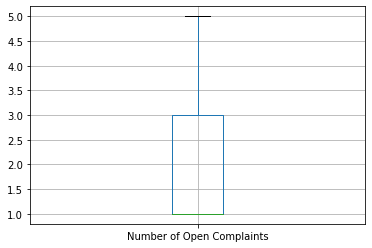

In [463]:
ca_df.boxplot(["Number of Open Complaints"])

<AxesSubplot:>

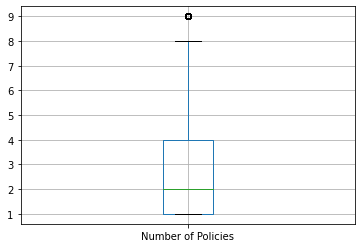

In [464]:
ca_df.boxplot(["Number of Policies"])

## X Y split

In [465]:
X=ca_df.drop("Total Claim Amount", axis=1)
y=ca_df["Total Claim Amount"]

In [466]:
X=X._get_numeric_data()
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029.0,61,7.0,52,NaN,9
1,2228.525238,NaN,64,3.0,26,NaN,1
2,14947.917300,22139.0,100,34.0,31,NaN,2
3,22332.439460,49078.0,97,10.0,3,NaN,2
4,9025.067525,23675.0,117,NaN,31,NaN,7
...,...,...,...,...,...,...,...
10905,15563.369440,NaN,253,NaN,40,NaN,7
10906,5259.444853,61146.0,65,7.0,68,NaN,6
10907,23893.304100,39837.0,201,11.0,63,NaN,2
10908,11971.977650,64195.0,158,0.0,27,4.0,6


array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

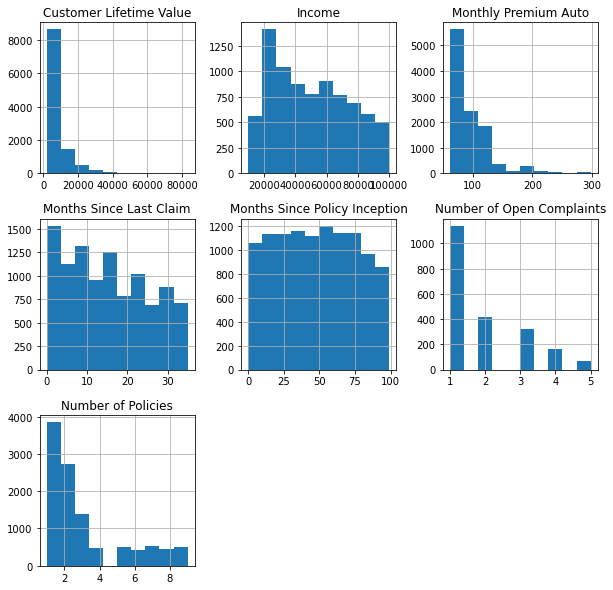

In [467]:
X.hist(figsize=(10,10))

## Data Transformation

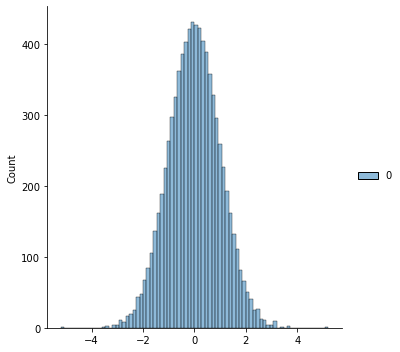

In [468]:
qt = QuantileTransformer(output_distribution="normal")
Income_transformed=qt.fit_transform(ca_df['Income'].to_numpy().reshape(-1,1))
sns.displot(Income_transformed)

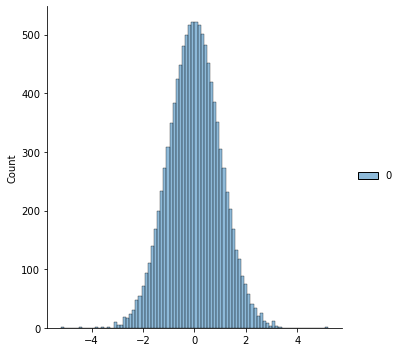

In [469]:
qt = QuantileTransformer(output_distribution="normal")
CLV_transformed=qt.fit_transform(ca_df['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(CLV_transformed)

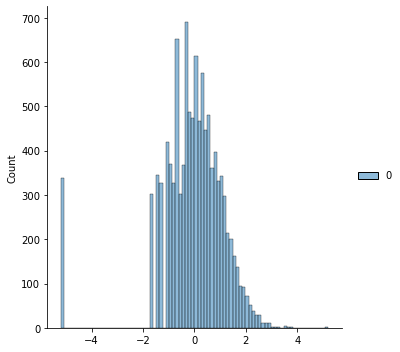

In [470]:
qt = QuantileTransformer(output_distribution="normal")
Mon_Prem_Auto_transformed=qt.fit_transform(ca_df['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(Mon_Prem_Auto_transformed)

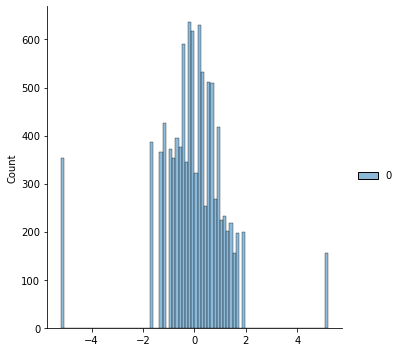

In [471]:
qt = QuantileTransformer(output_distribution="normal")
MSLC_transformed=qt.fit_transform(ca_df['Months Since Last Claim'].to_numpy().reshape(-1,1))
sns.displot(MSLC_transformed)

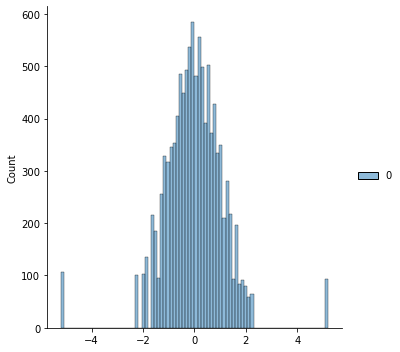

In [472]:
qt = QuantileTransformer(output_distribution="normal")
MPA_transformed=qt.fit_transform(ca_df['Months Since Policy Inception'].to_numpy().reshape(-1,1))
sns.displot(MPA_transformed)

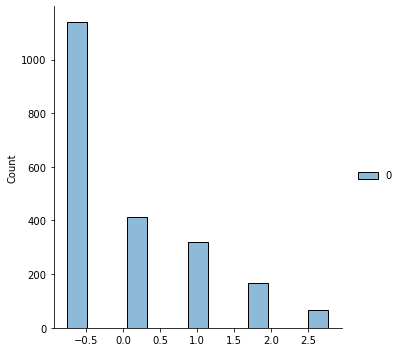

In [473]:
sc = StandardScaler()
Num_Open_Compl_scaled=sc.fit_transform(ca_df['Number of Open Complaints'].to_numpy().reshape(-1,1))
sns.displot(Num_Open_Compl_scaled)

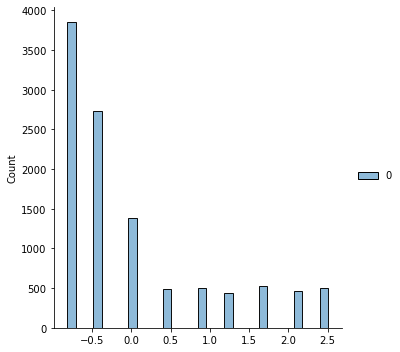

In [474]:
sc = StandardScaler()
Num_Policy_scaled=sc.fit_transform(ca_df['Number of Policies'].to_numpy().reshape(-1,1))
sns.displot(Num_Policy_scaled)

## Hot coding Categorical Variables

In [475]:
ca_df.drop(['Customer'],axis=1, inplace=True)

In [479]:
categoricals_features= ca_df.select_dtypes("object")
categoricals_features

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [478]:
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)

pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),

columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

,State_California_1,State_Nevada_1,State_Oregon_1,State_Washington_1,Response_Yes_1,Coverage_Extended_1,Coverage_Premium_1,Education_College_1,Education_Doctor_1,Education_High School or Below_1,...,Sales Channel_Branch_1,Sales Channel_Call Center_1,Sales Channel_Web_1,Vehicle Class_Luxury Car_1,Vehicle Class_Luxury SUV_1,Vehicle Class_SUV_1,Vehicle Class_Sports Car_1,Vehicle Class_Two-Door Car_1,Vehicle Size_Medsize_1,Vehicle Size_Small_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
